In [4]:
#Load libraries
import pandas
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import math


In [5]:
import time
from sklearn.preprocessing import normalize
from scipy.io import loadmat
from scipy import sparse
from scipy.sparse import csc_matrix
import scipy

# 1.1 Input Data

In [ ]:
#generate random x0
def generate_random_mat(X):
  #??????????
  shape = X.shape
  csc_matrix((data, indices, indptr),shape)
  return

def generate_random_array(X):
  A=np.random.rand(X.shape[0],X.shape[1])
  return A


In [6]:
#input dataset wine(mat)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
wine_data_mat = loadmat("/content/drive/MyDrive/wine_data.mat",mat_dtype=True)
wine_label_mat = loadmat("/content/drive/MyDrive/vowel_label.mat",mat_dtype=True)
wine_data=wine_data_mat['A']
wine_label=wine_label_mat['b']
wine_data

<13x178 sparse matrix of type '<class 'numpy.float64'>'
	with 2311 stored elements in Compressed Sparse Column format>

In [ ]:
type(wine_data)

scipy.sparse.csc.csc_matrix

In [ ]:
#input 200_dot_3
data_200_dot_3 = np.loadtxt('/content/drive/MyDrive/op_data/200_dot_3.txt')
x_200_dot_3 = data_200_dot_3[0]
y_200_dot_3 = data_200_dot_3[1]
c_200_dot_3 = data_200_dot_3[2]
data_200_dot_3 = np.stack((x_200_dot_3,y_200_dot_3), axis=1)
#normalization
#data_200_dot_3 = normalize(data_200_dot_3, axis=0, norm='max')

In [ ]:
A=csc_matrix((np.array([1,1]),(np.array([0,1]),np.array([0,1]))),shape=(2,2))
print(A)
x0=np.concatenate(list(map(lambda i:A.getcol(i).toarray(),range(A.shape[1]))),axis=0)
print(x0)

  (0, 0)	1
  (1, 1)	1
[[1]
 [0]
 [0]
 [1]]


# 1.2 Data Generation

In [ ]:
#Data Generation1: 多组随机分布，可重叠
np.random.seed(2)
def data_generation(n,d,range,theta):
  arr_1 = np.random.uniform(range[0][0],range[0][1],(d,1))
  arr_2 = np.random.uniform(range[1][0],range[1][1],(d,1))
  data_reference = np.hstack((arr_1,arr_2))
  data_group = np.random.choice(d,n)
  data_generation = list()
  for i in data_group:
    a = [data_reference[i][0]+random.normalvariate(0,theta[i]),data_reference[i][1]+random.normalvariate(0,theta[i])]
    data_generation.append(a)
  return data_group, np.array(data_generation)

label_generation1, data_generation1 =  data_generation(20000,4,[[-10,35],[-20,50]],[1,3,4,4])

In [ ]:
label_generation1[:10]

array([3, 3, 2, 0, 0, 0, 1, 3, 3, 2])

In [ ]:
data_generation1[:10]

array([[  7.38183262,  18.53381847],
       [ 16.47124386,  18.85042566],
       [ 17.96526856, -11.37935222],
       [  9.15350311,   7.89216773],
       [  9.68454685,   9.2207673 ],
       [  9.25765202,  10.09868185],
       [ -6.39040462,   7.75605541],
       [ 11.75298011,  26.05670181],
       [ 12.62277287,  21.19576917],
       [ 18.80959693,  -4.83780722]])

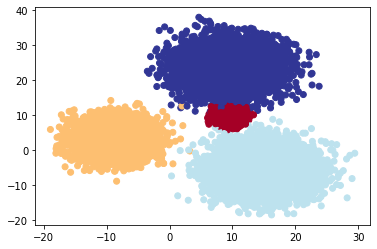

In [ ]:
x=data_generation1[:,0]
y=data_generation1[:,1]
c=label_generation1

fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=c, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
np.savetxt('/content/drive/MyDrive/op_data/20000_random_4.txt',(x,y,c),fmt="%f",delimiter=" ") 

In [ ]:
np.loadtxt('/content/drive/MyDrive/op_data/20000_random_4.txt')

array([[ 6.001663, 10.50215 ,  9.203917, ..., -6.475989, 14.149243,
         8.802743],
       [24.742916, 24.796914, -9.391078, ..., -4.532123, 21.569009,
         9.612711],
       [ 3.      ,  3.      ,  2.      , ...,  1.      ,  3.      ,
         0.      ]])

In [ ]:
#Data Generation2: 月牙形
np.random.seed(2)
def data_generation(n,range,theta):
  random.seed(3)
  a = random.uniform(range[0][0]/3,range[0][1]/3)
  b = random.uniform(range[0][0]/2,range[0][1]/2)
  x1 = np.linspace(range[0][0], (range[0][0]+range[0][1])/2, int(n/2), dtype=np.float32)[:, np.newaxis]
  noise = np.random.normal(0,theta,x1.shape).astype(np.float32)
  y1 = -np.square(x1) / a + b + noise

  x2 = np.linspace((range[0][0]+range[0][1])/2, range[0][1], int(n/2), dtype=np.float32)[:, np.newaxis]
  y2 = np.square(x2 - ((range[0][0]+range[0][1])/2)) / a - b + noise

  group1 = np.hstack((x1,y1))
  group2 = np.hstack((x2,y2))
  data_generation = np.vstack((group1,group2))

  data_group = np.hstack((np.zeros(int(n/2)),np.ones(int(n/2))))
  return data_group, data_generation

label_generation2, data_generation2 = data_generation(600,[[-40,40]],20)

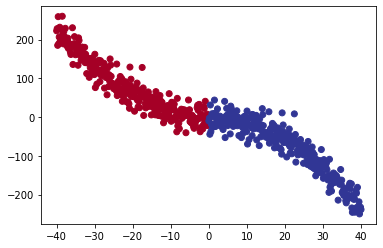

In [ ]:
x=data_generation2[:,0]
y=data_generation2[:,1]
c=label_generation2

fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=c, cmap=plt.cm.RdYlBu)
plt.show()

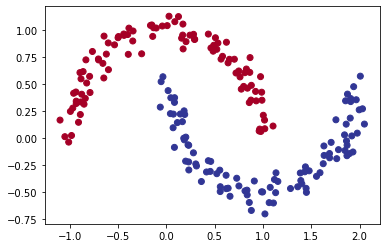

In [ ]:
from sklearn.datasets import make_moons
data_generation2, label_generation2 = make_moons(n_samples=200, noise=0.07, random_state=120)
x=data_generation2[:,0]
y=data_generation2[:,1]
c=label_generation2

fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=c, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
np.savetxt('/content/drive/MyDrive/op_data/20000_moon_2.txt',(x,y,c),fmt="%f",delimiter=" ")

In [ ]:
np.loadtxt('/content/drive/MyDrive/op_data/20000_moon_2.txt')

array([[ 1.301345, -0.232168,  1.337105, ...,  1.041118,  1.830101,
        -0.996427],
       [-0.39258 ,  0.919012, -0.57517 , ...,  0.166224, -0.186848,
         0.04093 ],
       [ 1.      ,  0.      ,  1.      , ...,  0.      ,  1.      ,
         0.      ]])

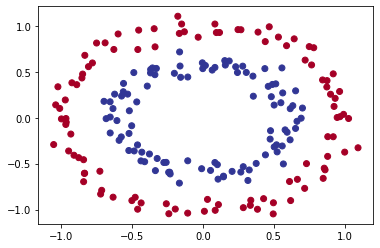

In [ ]:
#Data Generation3: 环形
np.random.seed(2)
from sklearn.datasets import make_circles
data_generation3, label_generation3 = make_circles(n_samples=200, noise=0.07, random_state=16, factor=0.6)
x=data_generation3[:,0]
y=data_generation3[:,1]
c=label_generation3

fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=c, cmap=plt.cm.RdYlBu)
plt.show()


In [ ]:
np.savetxt('/content/drive/MyDrive/op_data/20000_circle_2.txt',(x,y,c),fmt="%f",delimiter=" ")

In [ ]:
data = np.loadtxt('/content/drive/MyDrive/op_data/20000_circle_2.txt')
data

array([[-0.242445,  1.028226, -0.507559, ...,  0.101896, -0.56324 ,
        -0.398756],
       [-0.481182, -0.023361,  0.23061 , ...,  1.115946, -0.163832,
        -1.004195],
       [ 1.      ,  0.      ,  1.      , ...,  0.      ,  1.      ,
         0.      ]])

In [ ]:
x = data[0]
y = data[1]
label = data[2]

In [ ]:
label

array([1., 0., 1., ..., 0., 1., 0.])

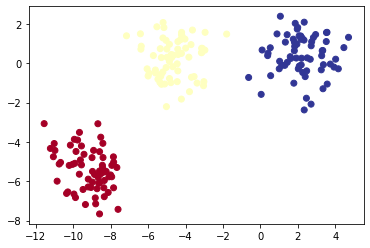

In [ ]:
#Data Generation4: 点簇型
from sklearn.datasets import make_blobs
data_generation4, label_generation4 = make_blobs(n_samples=200, n_features=2, centers=3, random_state=170)
x=data_generation4[:,0]
y=data_generation4[:,1]
c=label_generation4

fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=c, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
np.savetxt('/content/drive/MyDrive/op_data/200_dot_6.txt',(x,y,c),fmt="%f",delimiter=" ")

In [ ]:
np.loadtxt('/content/drive/MyDrive/op_data/200_dot_6.txt')

array([[ -4.231224,   9.38503 ,  -8.820109,  -8.509737,   1.491123,
          2.084805,   3.052731,   3.406646,  -6.389868,   5.596561,
         11.011831,  -3.630074,   3.568282,   2.821089,  -4.836493,
          5.735603,   4.085237,  -5.063571,   3.042293,  -0.62439 ,
          1.752007, -11.057776,   9.823629,  -9.664963,   5.871914,
          3.643768,  -8.859004,  -7.666742,   6.188483,   4.67336 ,
         -8.9101  ,   3.886935,  -4.842183,   6.277393,   4.686432,
          2.979242,  -8.338262,   7.998648,   2.479143,  -3.483877,
          1.454755,  -4.366615,   8.961127,   3.243597,   2.117107,
         -8.593432,   0.584585,   2.30615 ,  -6.616153,   1.180023,
         -8.414399,   6.315479,   3.753158,   3.610887,  -3.585121,
          9.731125,  -4.987116,   6.450472,   5.234636,   6.0332  ,
          2.310982,   2.841155,  -8.586396,  -4.614139, -10.857147,
          9.067647,   3.573263,   5.387719,   2.132658,   4.262629,
          9.655508,  -9.671432,   0.810706,  -3.

In [ ]:
#数据集生成 https://blog.csdn.net/qq_42730750/article/details/117286533

# 2.1 AGM

In [13]:
from numpy.linalg import norm
def f(x,a,lambda1,delta):
  f_1 = np.sum((norm(x[i]-a[i]))**2 for i in range(len(x)))
  x_diff = list()
  f_2 = 0
  for i in range(len(a)):
    # for j in range(i+1,len(a)):
    #   x_diff.append(x[i]-x[j])
    xi_diff = x[i] - x[i+1:]
    xi_diff_norm = norm(xi_diff, ord=2, axis=1)
    mask = xi_diff_norm <= delta
    f_2 += np.sum(xi_diff_norm[mask] ** 2 / (2*delta))
    f_2 += np.sum(xi_diff_norm[~mask] - delta/2)

  #f_2 = phi(x_diff,delta)
  return 1/2*(f_1) + lambda1 * f_2

def g(x,a,lambda1,delta):
  grad_1 = x - a
  grad_2 = np.zeros(x.shape)
  for i in range(x.shape[0]):
    xi_diff = x[i] - x[i+1:]
    xi_diff_norm = norm(xi_diff, ord=2, axis=1)
    mask = xi_diff_norm <= delta

    grad_2[i] += lambda1 * np.sum(xi_diff[mask] / delta, axis=0)
    grad_2[i] += lambda1 * np.sum(xi_diff[~mask] / np.expand_dims(xi_diff_norm[~mask], axis=1), axis=0) 

  return grad_1 + grad_2

In [14]:
def function(x,A,lamd,delta):
    '''
    Parameters
    ----------
    x : numpy.ndarray
        shape: (row*col,1)
        DESCRIPTION: The independent variable of function 'f_clust'.
        
    Returns
    -------
    type: float
        DESCRIPTION: The solution of f_clust.
        
    PS: A, row, col, lamd, delta all store as global variables.
    '''
    row=A.shape[0]
    col=A.shape[1]
    f1=[np.power(np.linalg.norm(x[i*row:(i+1)*row]-A[:, i].reshape(-1, 1)),2) for i in range(col)]
    f2=0
    for i in range(col):
        for j in range(i+1,col):
            n=np.linalg.norm(x[i*row:(i+1)*row]-x[j*row:(j+1)*row])
            f2+=0.5/delta*np.power(n,2) if n<=delta else n-delta*0.5
    return 0.5*sum(f1)+lamd*f2

def gradient(x,A,lamd,delta):
    '''

    Parameters
    ----------
    x : numpy.ndarray
        shape: (row*col,1)
        DESCRIPTION: The independent variable of gradient function.
    Returns
    -------
    type: numpy.ndarray
          shape: (row*col,1)
          DESCRIPTION: The solution of gradient function.

    '''
    row=A.shape[0]
    col=A.shape[1]
    solution1=np.asarray(np.concatenate(list(map(lambda i:x[i*row:(i+1)*row]-A[:, i].reshape(-1, 1),range(col))),axis=0))
    solution2=np.zeros([row*col,1])
    for i in range(col):
        for j in range(col):
            n=np.linalg.norm(x[i*row:(i+1)*row]-x[j*row:(j+1)*row])
            solution2[i*row:(i+1)*row]+=(x[i*row:(i+1)*row]-x[j*row:(j+1)*row])/delta if n<=delta else (x[i*row:(i+1)*row]-x[j*row:(j+1)*row])/n    
    return solution1+lamd*solution2


In [ ]:
gradient(x,A,0.05,1e-4)

array([[ 0.15606602],
       [ 0.10606602],
       [-0.05      ],
       [ 0.15      ],
       [-0.03535534],
       [-0.08535534],
       [-0.03535534],
       [-0.08535534],
       [-0.03535534],
       [-0.08535534]])

In [9]:
def AGM(obj,grad,x,options):
    alpha = options['alpha']
    tol = options['tol']
    isprint = options['isprint']

    k = 0
    x_pre = x
    t = 1
    t_pre = 1

    gradient = grad(x,A,lambda1,delta)
    x_lst = [x]
    gradient_lst = [norm(gradient)]
    while norm(gradient) >= tol and k < 30000:
        # accelerate
        beta = (t_pre -1)/t
        y = x + beta * (x - x_pre)
        # update
        x_pre = x
        x = y - alpha * grad(y,A,lambda1,delta)
        t_pre = t
        t = 1/2 * (1 + np.sqrt(1+4*t**2))
        gradient = grad(x,A,lambda1,delta)
        x_lst.append(x)
        gradient_lst.append(norm(gradient))
        k = k + 1
        if isprint:
            print("Iteration:",k,"obj:",obj(x,A,lambda1,delta),"norm_gradient:",norm(gradient))  ####
    return x,x_lst,gradient_lst

In [10]:
def invoke_AGM(f,g,x_init,options):
  global lambda1
  global delta
  lambda1 = options['lambda']
  delta = options['delta']

  L = 1+x_init.shape[0]*lambda1/delta
  alpha = 1/L
  options["alpha"] = alpha
  solution, x_lst, gradient_lst = AGM(f,g,x_init,options)

  print("Stepsize:",alpha,"NumIteration:",len(x_lst)-1)
  return solution,x_lst,gradient_lst

In [11]:
def plot_convergence_figure(obj, x_lst, gradient_lst, options, x_init):
    lambda1 = options['lambda']
    alpha = options['alpha']

    assert len(x_lst) == len(gradient_lst)
    iteration_num = len(gradient_lst)
    
    #The norm of the gradient VS #iterations
    plt.figure(dpi = 300, figsize=(6, 6.5))
    ax1 = plt.subplot(2, 1, 1)
    scatter = ax1.scatter(range(iteration_num), gradient_lst, s = 5)
    plt.title("The norm of the gradient VS #Iterations")
    ax1.set_xlabel('#iterations')
    ax1.set_ylabel('gradient norm')
    
    #Relative error VS #Iterations
    ax2 = plt.subplot(2, 1, 2)
    best_function_value = obj(x_lst[-1],x_init,lambda1,delta)
    scatter = ax2.scatter(range(iteration_num), [abs(obj(each,x_init,lambda1,delta) - best_function_value) / (max(1, abs(best_function_value))) for each in x_lst], s = 5)
    plt.title("Relative error VS #Iterations")
    ax2.set_xlabel('#iterations')
    ax2.set_ylabel('relative error')
    
    plt.tight_layout()
    plt.show()

In [ ]:
#test data_200_dot_3
T1 = time.time()
options = {
    "lambda":0.05,
    "delta":1e-4,
    "tol":1e-1,
    "isprint":True
}

A=data_200_dot_3
solution,x_lst,gradient_lst = invoke_AGM(f,g,A,options)

T2 = time.time()
run_time = (T2-T1)/60 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until


流式输出内容被截断，只能显示最后 5000 行内容。
Iteration: 8476 obj: 4897.263519216197 norm_gradient: 0.1995973808261251
Iteration: 8477 obj: 4897.265017308915 norm_gradient: 0.1998172119375337
Iteration: 8478 obj: 4897.266479892268 norm_gradient: 0.20010014707358634
Iteration: 8479 obj: 4897.267906938556 norm_gradient: 0.20047038811052484
Iteration: 8480 obj: 4897.269298416679 norm_gradient: 0.20096471804707805
Iteration: 8481 obj: 4897.270654291867 norm_gradient: 0.20163972399102986
Iteration: 8482 obj: 4897.2719745262675 norm_gradient: 0.2025812361575105
Iteration: 8483 obj: 4897.27325908208 norm_gradient: 0.203908565431527
Iteration: 8484 obj: 4897.274507929815 norm_gradient: 0.20574041242356927
Iteration: 8485 obj: 4897.275721060295 norm_gradient: 0.20804730163700488
Iteration: 8486 obj: 4897.276898478297 norm_gradient: 0.21042859962624458
Iteration: 8487 obj: 4897.278040151616 norm_gradient: 0.2122791873231961
Iteration: 8488 obj: 4897.279145979847 norm_gradient: 0.21337185264200045
Iteration: 8489 o

In [ ]:
run_time

10.966948787371317

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until


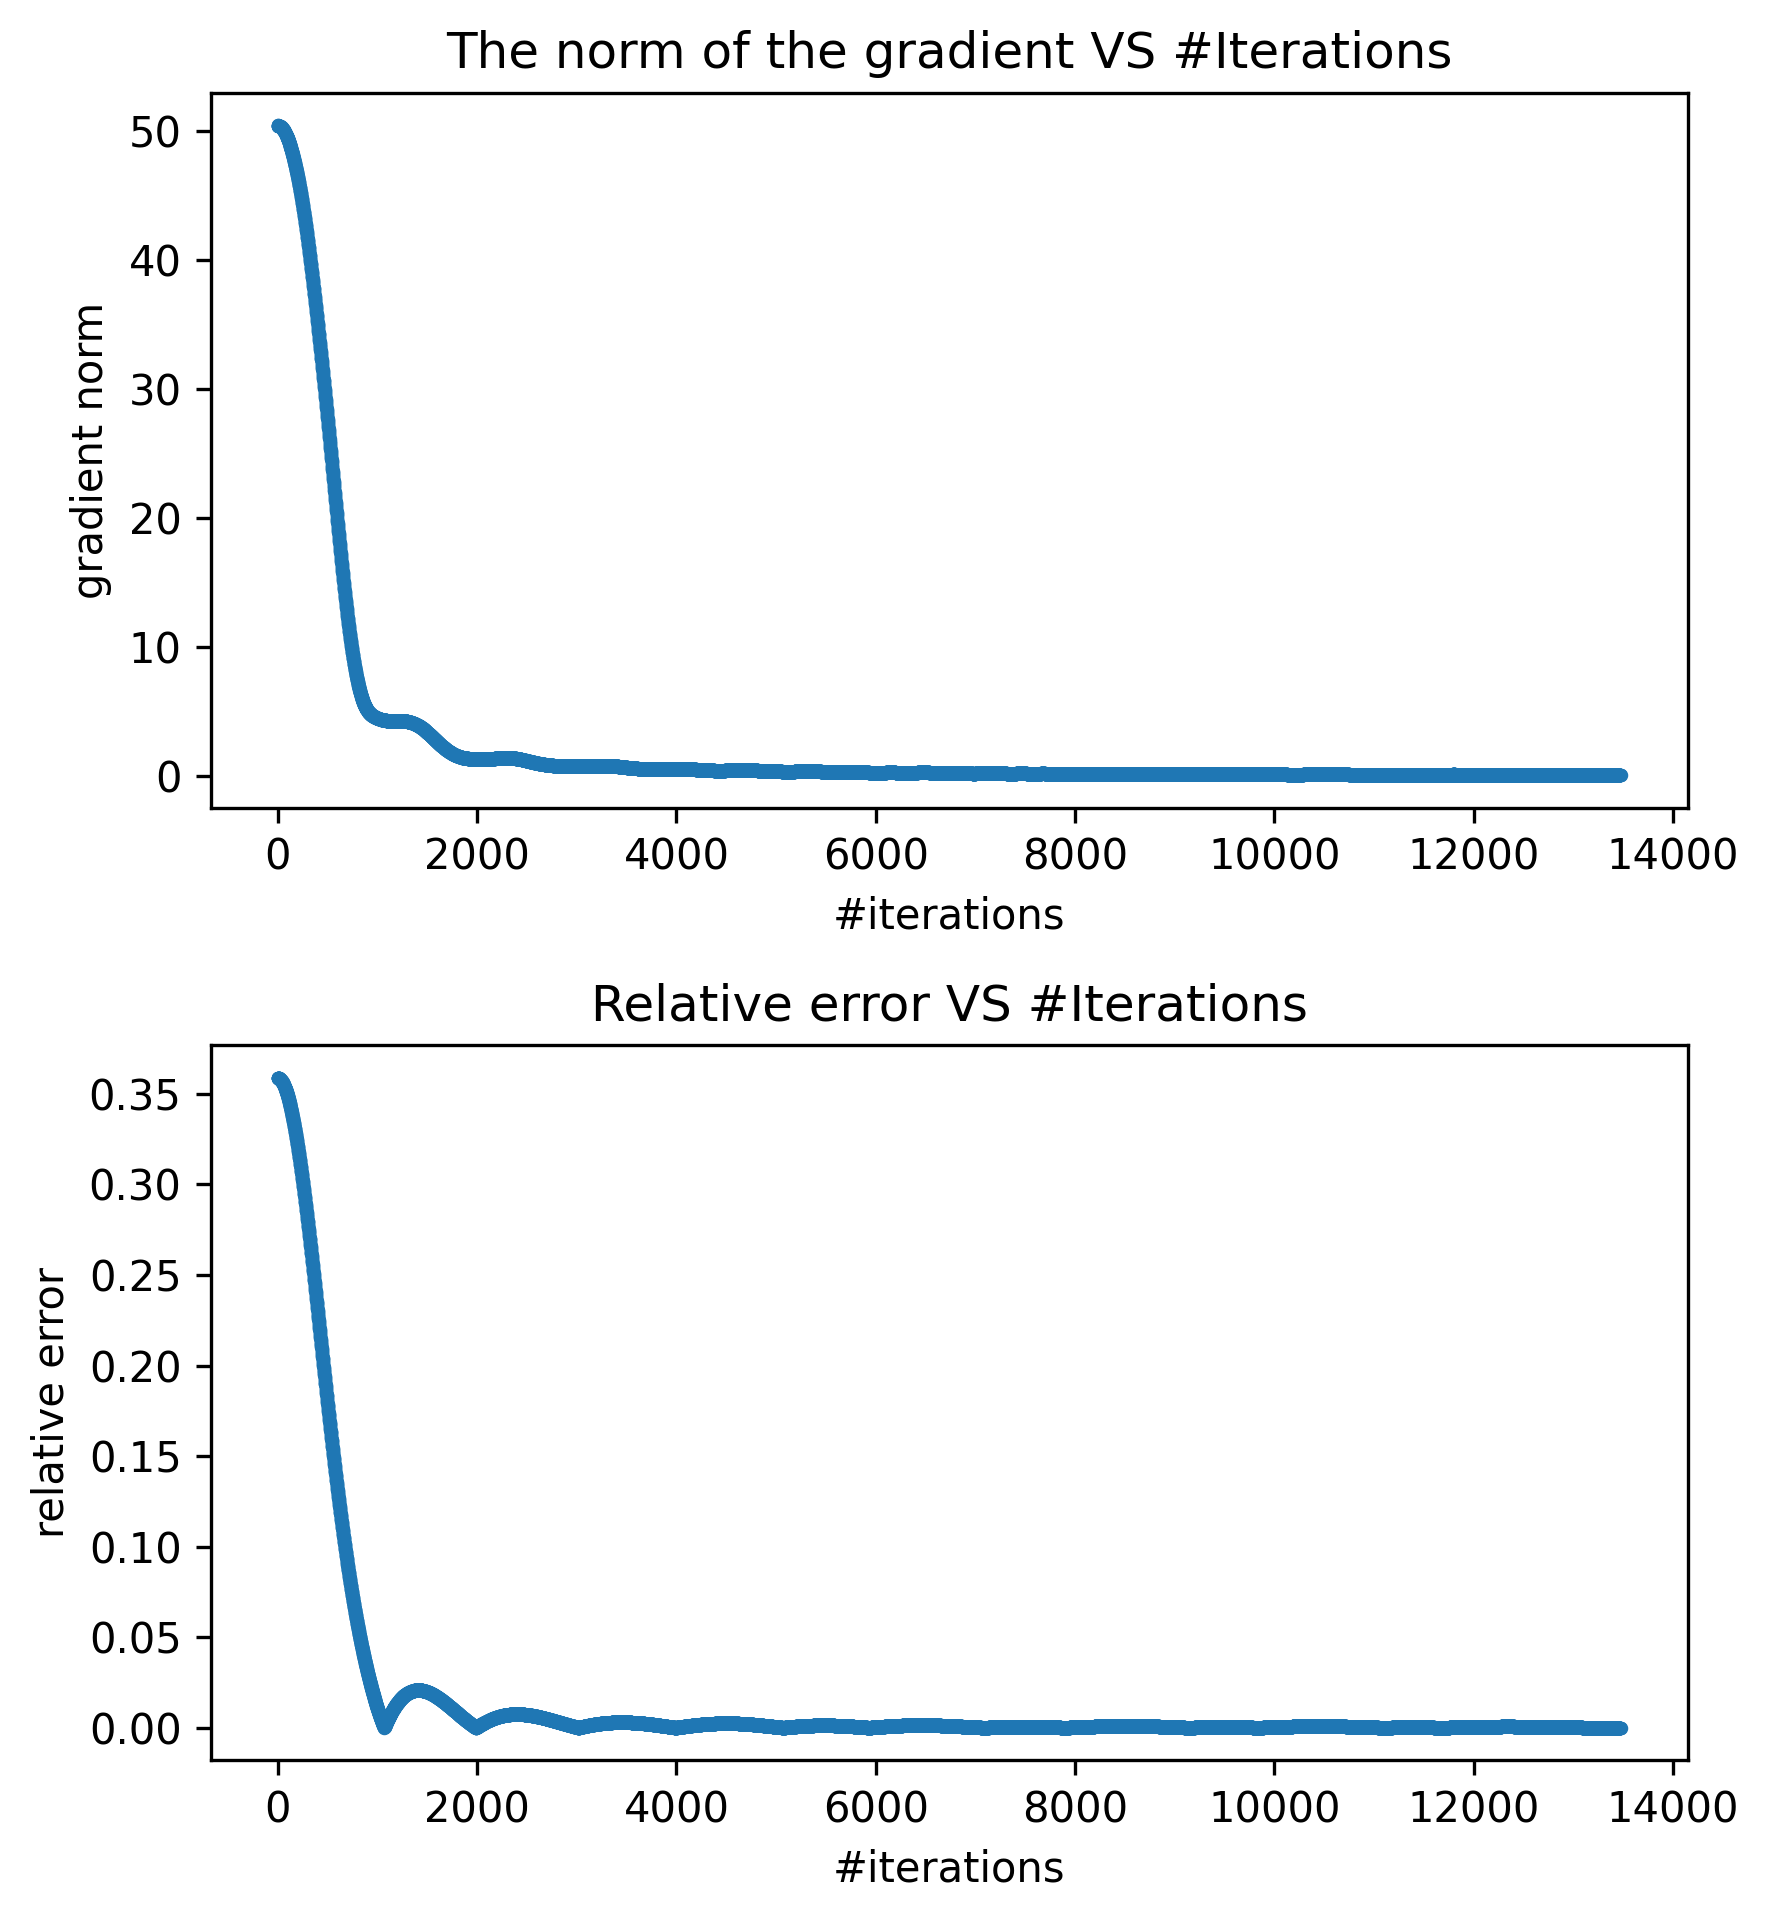

In [ ]:
plot_convergence_figure(f,x4_lst,gradient4_lst,options,data_200_dot_3)

In [ ]:
#test data_200_dot_3 with random x0
T1 = time.time()
options = {
    "lambda":0.05,
    "delta":1e-4,
    "tol":1e-1,
    "isprint":True
}

A=generate_random_array(data_200_dot_3)
solution,x_lst,gradient_lst = invoke_AGM(f,g,A,options)

T2 = time.time()
run_time = (T2-T1)/60 

NameError: ignored

In [ ]:
#test data_200_dot_3
T1 = time.time()
options = {
    "lambda":0.05,
    "delta":1e-4,
    "tol":1e-1,
    "isprint":True
}

A=data_200_dot_3
solution,x_lst,gradient_lst = invoke_AGM(function,gradient,A,options)

T2 = time.time()
run_time = (T2-T1)/60 

NameError: ignored

In [15]:
#test wine
T1 = time.time()
options = {
    "lambda":0.05,
    "delta":1e-4,
    "tol":1e-1,
    "isprint":True
}
A=wine_data
x0=np.concatenate(list(map(lambda i:A.getcol(i).toarray(),range(A.shape[1]))),axis=0)
solution,x_lst,gradient_lst = invoke_AGM(function,gradient,x0,options)
T2 = time.time()
run_time = (T2-T1)/60 

流式输出内容被截断，只能显示最后 5000 行内容。
Iteration: 4139 obj: 215.17636812230853 norm_gradient: 73.22608056971252
Iteration: 4140 obj: 215.1547861535866 norm_gradient: 73.2298599543102
Iteration: 4141 obj: 215.1333012499387 norm_gradient: 73.2339369379336
Iteration: 4142 obj: 215.11192181911625 norm_gradient: 73.23828368612546
Iteration: 4143 obj: 215.09065303957024 norm_gradient: 73.2428962948122
Iteration: 4144 obj: 215.06949764947484 norm_gradient: 73.24780223210698
Iteration: 4145 obj: 215.0484575673933 norm_gradient: 73.25301081804375
Iteration: 4146 obj: 215.02753271818688 norm_gradient: 73.25844658106281
Iteration: 4147 obj: 215.0067173978931 norm_gradient: 73.2640124497777
Iteration: 4148 obj: 214.98600138228323 norm_gradient: 73.26970185641176
Iteration: 4149 obj: 214.96537369186953 norm_gradient: 73.27556396286714
Iteration: 4150 obj: 214.9448239423165 norm_gradient: 73.28163805345798
Iteration: 4151 obj: 214.92434243580126 norm_gradient: 73.28792987480277
Iteration: 4152 obj: 214.90391986

# Weighted AGM

In [ ]:
def function(x,A,lamd,delta):
    '''
    Parameters
    ----------
    x : numpy.ndarray
        shape: (row*col,1)
        DESCRIPTION: The independent variable of function 'f_clust'.
        
    Returns
    -------
    type: float
        DESCRIPTION: The solution of f_clust.
        
    PS: A, row, col, lamd, delta all store as global variables.
    '''
    v=0.5
    row=A.shape[0]
    col=A.shape[1]
    f1=[np.power(np.linalg.norm(x[i*row:(i+1)*row]-A[:, i].reshape(-1, 1)),2) for i in range(col)]
    f2=0  
    for i in range(col-1):
        for j in index_list[i]:
            n=np.linalg.norm(x[i*row:(i+1)*row]-x[(j+i)*row:(j+i+1)*row])
            w=np.exp((-v)*A_dist_list[i][j])
            f2+=w*0.5/delta*np.power(n,2) if n<=delta else w*(n-delta*0.5)
            #f2+=w*n
    return 0.5*sum(f1)+lamd*f2

def gradient(x,A,lamd,delta):
    '''

    Parameters
    ----------
    x : numpy.ndarray
        shape: (row*col,1)
        DESCRIPTION: The independent variable of gradient function.
    Returns
    -------
    type: numpy.ndarray
          shape: (row*col,1)
          DESCRIPTION: The solution of gradient function.

    '''
    v=0.5
    row=A.shape[0]
    col=A.shape[1]
    solution1=np.asarray(np.concatenate(list(map(lambda i:x[i*row:(i+1)*row]-A[:, i].reshape(-1, 1),range(col))),axis=0))
    solution2=np.zeros([row*col,1])
    for i in range(col-1):
        for j in index_list[i]:
            n=np.linalg.norm(x[i*row:(i+1)*row]-x[(j+i)*row:(j+i+1)*row])
            w=np.exp((-v)*A_dist_list[i][j])
            solution2[i*row:(i+1)*row]+=w*(x[i*row:(i+1)*row]-x[(j+i)*row:(i+j+1)*row])/delta if n<=delta else (x[i*row:(i+1)*row]-x[(j+i)*row:(i+j+1)*row])/n
            #solution2[i*row:(i+1)*row]+=w*(x[i*row:(i+1)*row]-x[(j+i)*row:(j+i+1)*row])/n  
    return solution1+lamd*solution2


In [ ]:
def find_k_near(A,k):
  row=A.shape[0]
  col=A.shape[1]
  A_dist_list = list()
  index_list = list()
  for i in range(col-1):
    if k > col-i-1:
      k = col-i-1
    A_diff = sparse.hstack([A[:,i] for _ in range(col-i-1)]) - A[:, i+1:]
    A_dist = np.array(A_diff.power(2).sum(axis=0)).squeeze(axis=0)
    A_dist_list.append(A_dist)
    index = np.argpartition(A_dist,k)[k:]
    index_list.append(index)
  return A_dist_list, index_list

In [ ]:
from numpy.linalg import norm
def W_AGM(obj,grad,x,options):
    global A_dist_list
    global index_list

    alpha = options['alpha']
    tol = options['tol']
    isprint = options['isprint']
    ################################################
    A_dist_list, index_list = find_k_near(A,7)
    ################################################
    k = 0
    x_pre = x
    t = 1
    t_pre = 1

    gradient = grad(x,A,lambda1,delta)
    x_lst = [x]
    gradient_lst = [norm(gradient)]
    while norm(gradient) >= tol:
        # accelerate
        beta = (t_pre -1)/t
        y = x + beta * (x - x_pre)
        # update
        x_pre = x
        x = y - alpha * grad(y,A,lambda1,delta)
        t_pre = t
        t = 1/2 * (1 + np.sqrt(1+4*t**2))
        gradient = grad(x,A,lambda1,delta)
        x_lst.append(x)
        gradient_lst.append(norm(gradient))
        k = k + 1
        if isprint:
            print("Iteration:",k,"obj:",obj(x,A,lambda1,delta),"norm_gradient:",norm(gradient))  ####
    return x,x_lst,gradient_lst

In [ ]:
def invoke_W_AGM(f,g,x_init,options):
  global lambda1
  global delta
  lambda1 = options['lambda']
  delta = options['delta']

  L = 1+x_init.shape[0]*lambda1/delta
  alpha = 1/L
  options["alpha"] = alpha
  solution, x_lst, gradient_lst = W_AGM(f,g,x_init,options)

  print("Stepsize:",alpha,"NumIteration:",len(x_lst)-1)
  return solution,x_lst,gradient_lst

In [ ]:
#test wine
T1 = time.time()
options = {
    "lambda":0.05,
    "delta":1e-4,
    "tol":1e-1,
    "isprint":True
}
A=wine_data
x0=np.concatenate(list(map(lambda i:A.getcol(i).toarray(),range(A.shape[1]))),axis=0)
solution,x_lst,gradient_lst = invoke_W_AGM(function,gradient,x0,options)
T2 = time.time()
run_time = (T2-T1)/60 

流式输出内容被截断，只能显示最后 5000 行内容。
Iteration: 2376 obj: 8.475528724027546 norm_gradient: 1.9418574039057355
Iteration: 2377 obj: 8.47751403616889 norm_gradient: 1.9405670475245498
Iteration: 2378 obj: 8.47950110324114 norm_gradient: 1.9392766499276695
Iteration: 2379 obj: 8.481489924670642 norm_gradient: 1.9379862116121915
Iteration: 2380 obj: 8.483480499881257 norm_gradient: 1.936695733075174
Iteration: 2381 obj: 8.485472828294398 norm_gradient: 1.9354052148136345
Iteration: 2382 obj: 8.487466909329015 norm_gradient: 1.9341146573245518
Iteration: 2383 obj: 8.489462742401601 norm_gradient: 1.932824061104865
Iteration: 2384 obj: 8.491460326926175 norm_gradient: 1.931533426651472
Iteration: 2385 obj: 8.493459662314299 norm_gradient: 1.9302427544612322
Iteration: 2386 obj: 8.495460747975056 norm_gradient: 1.9289520450309625
Iteration: 2387 obj: 8.497463583315128 norm_gradient: 1.927661298857441
Iteration: 2388 obj: 8.499468167738657 norm_gradient: 1.9263705164374034
Iteration: 2389 obj: 8.5014745

In [16]:
print(run_time)

182.3957699418068


#test  find_k_near

In [ ]:
A=csc_matrix((np.array([1,1,1]),(np.array([0,1,1]),np.array([0,0,1]))),shape=(2,5))
x=np.concatenate(list(map(lambda i:A.getcol(i).toarray(),range(A.shape[1]))),axis=0)
np.array(A.todense())

array([[1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0]], dtype=int64)

In [ ]:
A_dist_list, index_list = find_k_near(A,2)

# Other

In [ ]:
import numpy as np
from numpy.linalg import norm

class UnionFindSet:
    def __init__(self, n):
        self.parent = list(range(n))

    #合并index1和index2所属集合
    def union(self, index1: int, index2: int):
        self.parent[self.find(index2)] = self.find(index1)

    #查找index结点的父结点（含路径压缩）
    def find(self, index: int) -> int:
        if self.parent[index] != index:
            self.parent[index] = self.find(self.parent[index])
        return self.parent[index]


X = solution4
#print(X)
uf = UnionFindSet(X.shape[0])
# clustering
tolerance = 3 # TBD

for i in range(X.shape[0]):
    for j in range(i+1, X.shape[0]):
        # 两两比较距离
        if norm(X[i] - X[j]) < tolerance:
            uf.union(i, j)
# 聚类结果
label_result4 = list()
for i in range(X.shape[0]):
    label_result4.append(uf.find(i)) # 第i条数据的聚类类别

# Visualization
print(label_result4)

[0, 1, 2, 2, 1, 1, 11, 1, 0, 0, 2, 11, 12, 1, 2, 2, 11, 11, 11, 12, 0, 12, 0, 1, 11, 11, 11, 2, 12, 1, 2, 12, 0, 12, 2, 12, 12, 0, 0, 1]


In [ ]:
print(label_generation4)

[2 0 4 4 0 0 3 0 2 2 4 3 1 0 4 4 3 3 3 1 2 1 2 0 3 3 3 4 1 0 4 1 2 1 4 1 1
 2 2 0]


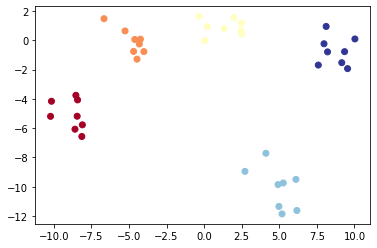

In [ ]:
#orginal data
x=data_generation4[:,0]
y=data_generation4[:,1]
c=label_generation4

fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=c, cmap=plt.cm.RdYlBu)
plt.show()

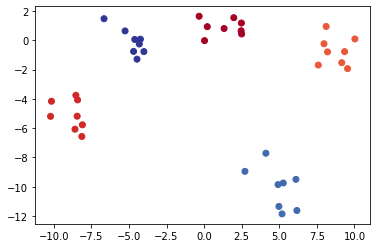

In [ ]:
#predict data
x=data_generation4[:,0]
y=data_generation4[:,1]
c=label_result4

fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=c, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
#test data_generation1
options = {
    "lambda":0.05,
    "delta":1e-4,
    "tol":1e-2,
    "isprint":True
}
solution_1,x1_lst,gradient1_lst = invoke_AGM(data_generation1,options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until


流式输出内容被截断，只能显示最后 5000 行内容。
Iteration: 19545 obj: 4204.985104240079 norm_gradient: 0.01412622807881912
Iteration: 19546 obj: 4204.985562108249 norm_gradient: 0.014139105089492829
Iteration: 19547 obj: 4204.9860204961 norm_gradient: 0.014152109857112637
Iteration: 19548 obj: 4204.986479394023 norm_gradient: 0.014165240536497987
Iteration: 19549 obj: 4204.9869387924255 norm_gradient: 0.014178495276192372
Iteration: 19550 obj: 4204.987398681695 norm_gradient: 0.014191872218794178
Iteration: 19551 obj: 4204.987859052215 norm_gradient: 0.01420536950129542
Iteration: 19552 obj: 4204.988319894357 norm_gradient: 0.014218985255424728
Iteration: 19553 obj: 4204.988781198484 norm_gradient: 0.014232717607967281
Iteration: 19554 obj: 4204.989242954961 norm_gradient: 0.014246564681104768
Iteration: 19555 obj: 4204.989705154138 norm_gradient: 0.014260524592736098
Iteration: 19556 obj: 4204.990167786358 norm_gradient: 0.014274595456789137
Iteration: 19557 obj: 4204.990630841961 norm_gradient: 0.0142887

In [ ]:
X = solution_1
#print(X)
uf = UnionFindSet(X.shape[0])
# clustering
tolerance = 4 # TBD

for i in range(X.shape[0]):
    for j in range(i+1, X.shape[0]):
        # 两两比较距离
        if norm(X[i] - X[j]) < tolerance:
            uf.union(i, j)
# 聚类结果
label_result1 = list()
for i in range(X.shape[0]):
    label_result1.append(uf.find(i)) # 第i条数据的聚类类别

# Visualization
print(label_result1)
print(set(label_result1))

[8, 8, 11, 3, 3, 3, 91, 8, 8, 11, 3, 11, 8, 8, 8, 11, 11, 91, 18, 3, 8, 8, 91, 3, 3, 11, 11, 8, 8, 91, 8, 11, 3, 3, 11, 3, 11, 3, 11, 8, 8, 91, 8, 8, 11, 3, 11, 91, 11, 8, 91, 91, 3, 8, 91, 11, 3, 11, 91, 91, 91, 91, 11, 3, 11, 11, 8, 3, 8, 3, 11, 11, 3, 3, 11, 11, 3, 11, 3, 91, 11, 91, 11, 11, 11, 8, 3, 11, 91, 3, 3, 91, 91, 11, 91, 91, 91, 91, 11, 3]
{3, 8, 11, 18, 91}


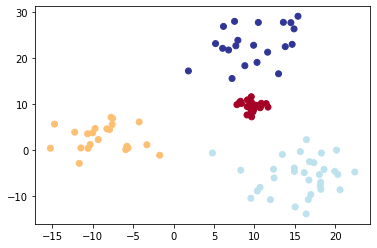

In [ ]:
#orginal data
x=data_generation1[:,0]
y=data_generation1[:,1]
c=label_generation1

fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=c, cmap=plt.cm.RdYlBu)
plt.show()

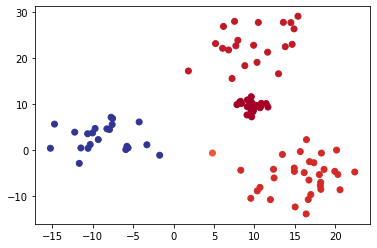

In [ ]:
#predict data
x=data_generation1[:,0]
y=data_generation1[:,1]
c=label_result1

fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=c, cmap=plt.cm.RdYlBu)
plt.show()